In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [94]:
# Imports
import sys
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_motion_CoM
%store -r Y_motion_CoM
print(X_motion_CoM.shape)
print(Y_motion_CoM.shape)

(12870, 28)
(12870, 2)


In [6]:
X_motion_CoM[0].shape

(28,)

In [119]:
# Shuffle dataset
shuffled_idx = np.random.permutation(len(X_motion_CoM))
X = X_motion_CoM[shuffled_idx].astype("float32")
Y = Y_motion_CoM[shuffled_idx].astype("float32")

# Features
X = np.hstack((X[:, :2], np.array([X[:, 5]]).T, # Motion command
               X[:, 6:8], X[:, 9:11], X[:, 12:14], X[:, 15:17], # Relative feet position
               X[:, 24:26], # Swinging configuration
               X[:, 26:28])) # Previous displacement

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True, random_state=40)

# Create the model
def model():
    model = Sequential()
    model.add(Dense(32, input_dim=X[0].shape[0], activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
    return model
    
# Evaluate model
estimator = KerasRegressor(build_fn=model, epochs=50, batch_size=100, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)

In [114]:
print(f"Eval. mean error: {results.mean()}. Eval. std: {results.std()}")

Eval. mean error: -0.007908245921134949. Eval. std: 0.0010107942048229953


In [104]:
print(f"Eval. mean error: {results.mean()}. Eval. std: {results.std()}")

Eval. mean error: -0.007847689464688301. Eval. std: 0.00040592767937943215


In [106]:
print(f"Eval. mean error: {results.mean()}. Eval. std: {results.std()}")

Eval. mean error: -0.007506171939894557. Eval. std: 0.0003369238564239131


In [120]:
# Fit estimator
estimator.fit(X_train, Y_train)

In [121]:
# Predictions
predictions = estimator.predict(X_test)

In [122]:
test_error =  np.abs(Y_test - predictions)
mean_error = np.mean(test_error)
min_error = np.min(test_error)
max_error = np.max(test_error)
std_error = np.std(test_error)

In [118]:
print(mean_error, min_error, max_error, std_error)

0.0073298695 1.0905787e-06 0.101440825 0.009767055


In [123]:
print(mean_error, min_error, max_error, std_error)

0.0071436237 1.3110694e-06 0.09055811 0.009473343


In [88]:
test_loss, test_mse, test_accuracy = model.evaluate(X_test, Y_test)
print("Test loss: ", test_loss)
print("Test MSE: ", test_mse)
print("Test accuracy: ", test_accuracy)

AttributeError: 'function' object has no attribute 'evaluate'

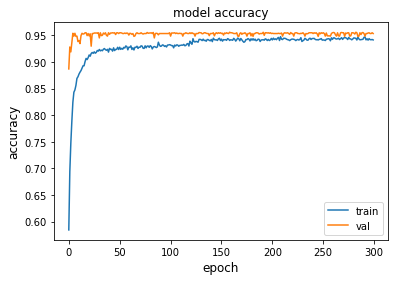

In [77]:
metric = "accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

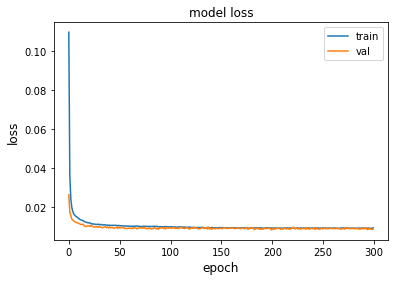

In [78]:
metric = "loss"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

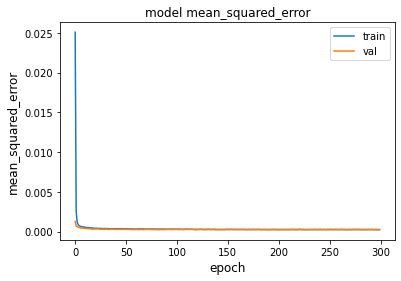

In [79]:
metric = "mean_squared_error"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()